# **THE BATTLE OF NEIGHBORHOODS IN HONG-KONG - Capstone Project (Week 2)**

--------

**Where to open a French Pastry Shop in Hong-Kong?**

In this study, I will use location data to explore a geographical location, and use Data Science technique like Visualization and Clustering to solve the business problem I defined below.

# **A. Introduction & Business Problem**
--------

### **A. 1. Background**

Hong Kong is one of the most cosmopolitan cities in Asia and also one of the most densely populated territories in the world. 

Offering every kind of culinary treats from around the world, from cheap eats and street food to Michelin-starred restaurants, Hong Kong has a well-deserved reputation as a culinary paradise. 

### **A. 2. Business Problem**

As a French expat living in this urban jungle,  I love being able to treat myself to a nice little sweet treat at every corner, but I realize how much I was missing it in Hong Kong. The thing is, the sweet offered in Hong Kong isn’t really exciting. 

It seems you can only find decent French pastries in luxury hotels, whereas in France, yummy pastries are to be found at every street corner. 

I saw it as a potential opportunity for me to launch my own company to bring something new and fresh to the French pastry scene in Hong Kong.

Now, the big question is where to set up this new French pastry shop?

### **A.3 Target audience**

•	Entrepreneurs or pastry chefs considering opening a French pastry, bakery or dessert shops in HK

•	Expats looking for a career transition and to seize food-related business opportunities in the city

•	Tourists interested in knowing where are located the different types of desserts shops in HK, as well as the most popular ones.


# **B. Data**
--------

### **B. 1. Data Source**

Main data is from 3 sources:

1. List of districts and neighborhoods in Hong Kong from Wikipedia (https://en.wikipedia.org/wiki/List_of_places_in_Hong_Kong)

2. Coordinate’s data from https://www.maps.ie/coordinates.html. 

3. Foursquare to get the most common venues of a given neighborhood in HK

### **B. 2. Data Cleaning** 

Hong Kong consists of Hong Kong Island, the Kowloon Peninsula, the New Territories, the Outlying Islands (Lantau Island, and over 200 other islands). 
***This project will focus only on Hong Kong Island and Kowloon data.*** 
In fact, the inhabited part of Hong Kong is mainly: Kowloon, which is more traditional, and Hong Kong Island, which is the glitzier side of town.

After scraping and cleaning the Wikipedia and coordinates data, I created a csv file *'neighborhoods hongkong.csv'* combining the neighborhood’s data of interest, along with their latitude and longitude.

# **C. Methodology**
--------

To solve the problem I defined above:

•	We will start by some exploratory data analysis and use Visualization technique like Folium and Foursquare API location data to explore neighborhoods and most popular venues in Hong-Kong

•	Then, we will use machine learning method like the K-Mean algorithm to cluster the neighborhoods according to their similarities 

•	Finally, combining the results from all the above analysis, we will discuss and recommend a proper location to open our French Pastry Shop in last sections of this report.



In [1]:
#Let's start by importing all the librairies needed for our study
import requests
import folium
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         235 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.1.19-~ --> conda-forge::ca-certificates-


### **C. 1. Data pre-processing: loading and reading data into a Pandas dataframe**

In order to segment the neighborhoods in Hong-Kong and explore them, we will need the dataset that contains the districts and the neighborhoods that exist in each districts, as well as the the latitude and logitude coordinates of each neighborhood. 

Let's load the 'neighborhoods hongkong.csv' file and read it in **df_hk**.

In [2]:
df_hk = pd.read_csv('neighborhoods hongkong.csv')
df_hk.head()

,District,Neighborhood,Latitude,Longitude
0,Central & Western,Central District,22.281322,114.160258
1,Central & Western,Mid-Levels,22.282405,114.145809
2,Central & Western,The Peak,22.272003,114.152417
3,Central & Western,Sai Wan,22.285838,114.134023
4,Central & Western,Sheung Wan,22.286870,114.150267


Checking the shape of the DataFrame.

In [3]:
print(df_hk.shape)
print('The dataframe has {} districts and {} neighborhoods.'.format(
        len(df_hk['District'].unique()),df_hk.shape[0]))

(60, 4)
The dataframe has 9 districts and 60 neighborhoods.




### **C. 2. Visualizing the geographic data using Folium**

**Use geopy library to get the latitude and longitude values of Hong Kong.**

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent hk_explorer, as shown below.

In [4]:
address = 'Hong Kong'

geolocator = Nominatim(user_agent="hk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong-Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong-Kong are 22.2793278, 114.1628131.


<br>

**Use Folium to create a map of HK with neighborhoods superimposed on top.**

In [5]:
# create map of HK using latitude and longitude values
map_hk = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood in zip(df_hk['Latitude'], df_hk['Longitude'], df_hk['District'], df_hk['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)  
    
map_hk

### **C. 3. Exploring and Segmenting the Neighborhoods using Foursquare's API**


In [6]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'KSALW3TIP1RQBFSZMCV1VXUYSGUH1QPJBSWIYY5NVJZBLVDG'
CLIENT_SECRET = 'QVOZJEIKULRLTSLXZDM0E02OEXCDZPXA2OV1W5EHHHJIBOXQ'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KSALW3TIP1RQBFSZMCV1VXUYSGUH1QPJBSWIYY5NVJZBLVDG
CLIENT_SECRET:QVOZJEIKULRLTSLXZDM0E02OEXCDZPXA2OV1W5EHHHJIBOXQ


#### Explore the first neighborhood in our dataframe

Get the neighborhood's name.

In [7]:
df_hk.loc[0, 'Neighborhood']

'Central District'

Get the neighborhood's latitude and longitude values.

In [8]:
neighborhood_latitude = df_hk.loc[0, 'Latitude'] 
neighborhood_longitude = df_hk.loc[0, 'Longitude'] 

neighborhood_name = df_hk.loc[0, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central District are 22.2813223, 114.16025790000002.


<br>
Now, let's get the top 100 venues that are in Central District within a radius of 500 meters.

*First, let's create the GET request URL and name it **url**.*

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=KSALW3TIP1RQBFSZMCV1VXUYSGUH1QPJBSWIYY5NVJZBLVDG&client_secret=QVOZJEIKULRLTSLXZDM0E02OEXCDZPXA2OV1W5EHHHJIBOXQ&v=20180605&ll=22.2813223,114.16025790000002&radius=500&limit=100'

*Send the GET request and examine the results*

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607042162437f202281533fd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central and Western District',
  'headerFullLocation': 'Central and Western District, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 22.285822304500005,
    'lng': 114.16511193708136},
   'sw': {'lat': 22.276822295499993, 'lng': 114.15540386291867}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c7fa26501df37045bb4e6ac',
       'name': 'Mandarin Grill + Bar (文華扒房＋酒吧)',
       'location': {'address': '1/F, Mandarin Oriental Hong Kong, 5 Connaught Road Central, Central',
        'lat': 22.281928,
    

*We know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.*

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

*Now we are ready to clean the json and structure it into a _pandas_ dataframe.*

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Mandarin Grill + Bar (文華扒房＋酒吧),Steakhouse,22.281928,114.159408
1,Mandarin Oriental Hong Kong (香港文華東方酒店),Hotel,22.281857,114.159382
2,Mott 32 (卅二公館),Dim Sum Restaurant,22.280286,114.159080
3,Man Wah (文華廳),Cantonese Restaurant,22.281993,114.159242
4,8½ Otto e Mezzo Bombana,Italian Restaurant,22.281726,114.158767


And how many venues were returned by Foursquare?

In [13]:
print('{} venues were returned by Foursquare for {}.'.format(nearby_venues.shape[0],neighborhood_name))

76 venues were returned by Foursquare for Central District.


#### Create a function to repeat the same process to all the neighborhoods

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Here we will create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # here we will make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called _hk_venues_.

In [15]:
hk_venues = getNearbyVenues(names=df_hk['Neighborhood'],
                                   latitudes=df_hk['Latitude'],
                                   longitudes=df_hk['Longitude']
                                  )

Central District
Mid-Levels
The Peak
Sai Wan
Sheung Wan
Chai Wan
North Point
Quarry Bay
Sai Wan Ho
Shau Kei Wan
Siu Sai Wan
Aberdeen
Ap Lei Chau
Chung Hom Kok
Cyberport
Deep Water Bay
Pok Fu Lam
Tin Wan
Repulse Bay
Stanley
Shek O
Tai Tam
Wong Chuk Hang
Causeway Bay
Happy Valley
Tai Hang
Wan Chai
Ho Man Tin
Hung Hom
Kowloon City
Kowloon Tong
Kowloon Tsai
Ma Tau Kok
Ma Tau Wai
To Kwa Wan
Cha Kwo Ling
Kwun Tong
Lam Tin
Ngau Tau Kok
Kowloon Bay
Sau Mau Ping
Yau Tong
Cheung Sha Wan
Lai Chi Kok
Sham Shui Po
Shek Kip Mei
Stonecutters Island
Yau Yat Chuen
Diamond Hill
Kowloon Peak
Ngau Chi Wan
San Po Kong
Tsz Wan Shan
Wang Tau Hom
Wong Tai Sin
Mong Kok
Tai Kok Tsui
Tsim Sha Tsui
Tsim Sha Tsui East
Yau Ma Tei


Let's find out how many entries there are in our dataset.

In [16]:
print(hk_venues.shape)
hk_venues.head()

(1840, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central District,22.281322,114.160258,Mandarin Grill + Bar (文華扒房＋酒吧),22.281928,114.159408,Steakhouse
1,Central District,22.281322,114.160258,Mandarin Oriental Hong Kong (香港文華東方酒店),22.281857,114.159382,Hotel
2,Central District,22.281322,114.160258,Mott 32 (卅二公館),22.280286,114.159080,Dim Sum Restaurant
3,Central District,22.281322,114.160258,Man Wah (文華廳),22.281993,114.159242,Cantonese Restaurant
4,Central District,22.281322,114.160258,8½ Otto e Mezzo Bombana,22.281726,114.158767,Italian Restaurant


Let's check how many venues were returned for each neighborhood

In [17]:
hk_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aberdeen,25,25,25,25,25,25
Ap Lei Chau,27,27,27,27,27,27
Causeway Bay,75,75,75,75,75,75
Central District,76,76,76,76,76,76
Cha Kwo Ling,6,6,6,6,6,6
Chai Wan,21,21,21,21,21,21
Cheung Sha Wan,36,36,36,36,36,36
Chung Hom Kok,3,3,3,3,3,3
Cyberport,27,27,27,27,27,27


*Let's clean up the above table and sort them in descending order*

In [18]:
summary = hk_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count',ascending=False).reset_index(drop=True)
summary.head()

,Neighborhood,Count
0,Quarry Bay,100
1,Tsim Sha Tsui,100
2,Mong Kok,88
3,Tsim Sha Tsui East,88
4,Central District,76


*Let's create a bar chart and analyze the big picture of it*

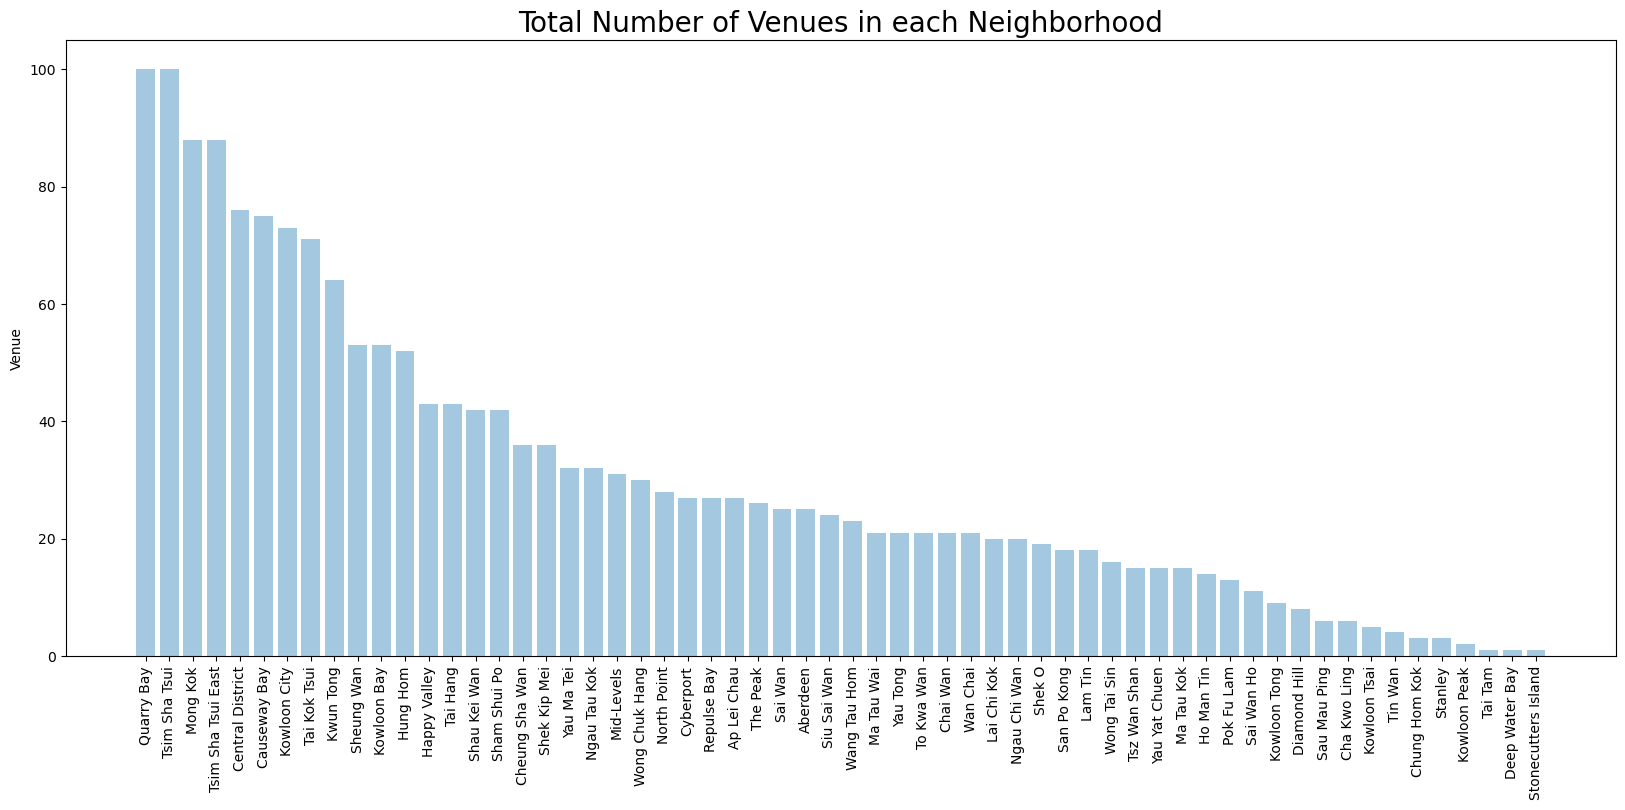

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.figure(figsize=(20,8)) 
plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venues in each Neighborhood', fontsize=20)
plt.xticks(rotation=90)

plt.show()

Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(hk_venues['Venue Category'].unique())))

There are 223 uniques categories.


In [21]:
hk_venues['Venue Category'].unique().tolist()

['Steakhouse',
 'Hotel',
 'Dim Sum Restaurant',
 'Cantonese Restaurant',
 'Italian Restaurant',
 'Bakery',
 'Lounge',
 'Cupcake Shop',
 'Chinese Restaurant',
 'Bookstore',
 'Café',
 'Deli / Bodega',
 'Hotel Bar',
 'Japanese Restaurant',
 'French Restaurant',
 'Social Club',
 'Thai Restaurant',
 'Plaza',
 'Cycle Studio',
 'Gym / Fitness Center',
 'Speakeasy',
 'Bar',
 'Shopping Mall',
 'Electronics Store',
 'Vegetarian / Vegan Restaurant',
 'Department Store',
 'Coffee Shop',
 'Park',
 'Cocktail Bar',
 'Zoo',
 'Yoga Studio',
 'Massage Studio',
 'Sandwich Place',
 'BBQ Joint',
 'Sushi Restaurant',
 'Cosmetics Shop',
 'Airport Service',
 'Asian Restaurant',
 'English Restaurant',
 'Cha Chaan Teng',
 'Theme Park Ride / Attraction',
 'Burger Joint',
 'Historic Site',
 'Gym',
 'General Travel',
 'Shanghai Restaurant',
 'Squash Court',
 'Clothing Store',
 'Garden',
 'Beer Store',
 'Scandinavian Restaurant',
 'Tea Room',
 'Tapas Restaurant',
 'Restaurant',
 'Hong Kong Restaurant',
 'Pizza Plac

#### Refine the analysis and explore the pastry scene

We would like to see only the bakery, pastry, dessert and cake shops (defined as the pastry scene)

In [22]:
df_pastry = hk_venues[hk_venues['Venue Category'].str.contains("Bakery|Pastry|Dessert|Cake")].reset_index(drop=True)
df_pastry = df_pastry.rename(columns={'Venue Category':'Category'})
print(df_pastry.shape)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_pastry

(65, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,Central District,22.281322,114.160258,The Mandarin Cake Shop,22.281959,114.159416,Bakery
1,Central District,22.281322,114.160258,Urban Bakery Works,22.281240,114.158146,Bakery
2,Mid-Levels,22.282405,114.145809,Sweeties' Dessert 糖痴豆 (糖痴豆),22.284321,114.142419,Dessert Shop
3,The Peak,22.272003,114.152417,Tai Cheong Bakery (泰昌餅家),22.270565,114.149801,Bakery
4,The Peak,22.272003,114.152417,The Sweet Dynasty (糖朝),22.270996,114.149834,Dessert Shop
5,Sai Wan,22.285838,114.134023,Holland 100% Dessert 荷蘭糖水 (荷蘭糖水),22.284566,114.130763,Dessert Shop
6,Chai Wan,22.265607,114.237964,Saint Honore Cake Shop (聖安娜餅屋),22.263900,114.237284,Bakery
7,Sai Wan Ho,22.282446,114.221506,明記糖水,22.281581,114.221649,Dessert Shop
8,Shau Kei Wan,22.279343,114.228898,Tsui Yuen Dessert (翠苑甜品專家),22.278551,114.229506,Dessert Shop
9,Siu Sai Wan,22.263727,114.250208,Honeymoon Dessert (滿記甜品),22.265455,114.248874,Dessert Shop


Let's create a new dateframe with only the french pastry shops

In [23]:
french_pastry=hk_venues[hk_venues['Venue'].str.contains("Ceres|Kayser|Passion|Paris")].reset_index(drop=True)
print(french_pastry.shape)
pd.set_option("display.max_rows", None, "display.max_columns", None)
french_pastry

(6, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Happy Valley,22.268464,114.186029,Maison Eric Kayser,22.270354,114.185429,Bakery
1,Kowloon City,22.331013,114.190366,Ceres Boulangerie et Patisserie,22.328188,114.187598,Bakery
2,Ma Tau Wai,22.324115,114.186379,Ceres Boulangerie et Patisserie,22.328188,114.187598,Bakery
3,Mong Kok,22.319685,114.168397,Passion by Gérard Dubois,22.318521,114.168517,Bakery
4,Tsim Sha Tsui,22.298872,114.174118,Maison Eric Kayser,22.296739,114.173747,Coffee Shop
5,Tsim Sha Tsui,22.298872,114.174118,Gontran Cherrier Artisan Boulanger Paris,22.294884,114.174504,Bakery


Note: 'Ceres Boulangerie et Patisserie' appears twice but their is only 1 shop (same venue latitude and longitude, but the shop have been referenced twice because of the neighborhood name: Ma Tau Wai is simply the Chinese name of the Kowloon City neighborhood)

HK has 65 pastry shops, of which 5 are french. Now that we reduced the data a little bit, let's visualize where these shops are located. 

In [24]:
from folium import plugins

# create map of HK using latitude and longitude values
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, neighborhood, category in zip(df_pastry['Venue Latitude'], df_pastry['Venue Longitude'], 
                                                   df_pastry['Venue'], df_pastry['Neighborhood'], df_pastry['Category']):
    label = '{} / {} / {}'.format(venue, category, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label, #just add the text to the circle markers themselves
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(m)     
m


If we find the map to be so congested will all these circle markers, the remedy is to group the markers into different clusters. Each cluster is then represented by the number of shops in each neighborhood. These clusters can be thought of as pockets of HK which we can then analyze separately.

To implement this, we start off by instantiating a _MarkerCluster_ object and adding all the data points in the dataframe to this object.

In [25]:
# let's start again with a clean copy of the map of HK
m = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
shops = plugins.MarkerCluster().add_to(m)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, venue, category, in zip(df_pastry['Venue Latitude'], df_pastry['Venue Longitude'],df_pastry['Venue'],df_pastry['Category']):
    label = '{} / {} / {}'.format(venue, category, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(shops)

# display map
m

Notice how when you zoom out all the way, all markers are grouped into one cluster, _the global cluster_, of 65 markers or shops, which is the total number of shops in our df_pastry dataframe. Once you start zooming in, the _global cluster_ will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.


<br>
Now let's:

- refine by the pastry shops by category and superimpose the locations of the shops onto the map. In fact, according to the Foursquare classification, our French pastry shop will fall more into the “Bakery” category than the “Dessert Shop” category. The former is comprised of existing French Bakery (see above) and the latter is mainly comprised of locals’ dessert or bakery shops.
The way to do that in Folium is to create a _feature group_ with its own features and style and then add it to the map.

- add markers to distinguish the French pastry shops in the map

In [26]:
# create new map and display it
map_cat = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a feature group for the shops category in the dataframe
shop_cat = folium.map.FeatureGroup()

def color_producer(xyz):
    if xyz == 'Bakery':
        return 'orange'
    elif xyz=='Dessert Shop':
        return 'green'
    else:
        return 'yellow'
    
# loop through the 61 shops and add each to the shop_cat feature group 
# Iterating over the  lat, lng, venue, cat, neighborhood columns simultaneously using zip()
for lat, lng, venue, cat, neighborhood in zip(df_pastry['Venue Latitude'], df_pastry['Venue Longitude'], df_pastry['Venue'],
                                                   df_pastry['Category'],df_pastry['Neighborhood']):
    label = '{} / {} / {}'.format(venue, cat, neighborhood)
    label = folium.Popup(label, parse_html=True)
    
    shop_cat.add_child(
        folium.features.CircleMarker(
            [lat, lng], # Marker() takes location coordinates as a list as an argument
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color=color_producer(cat),
            popup=label,
            fill_opacity=1,
            parse_html=True
        )
    )

    
# adding markers for the French Pastry Shops
for lat, lng, venue, neighborhood in zip(french_pastry['Venue Latitude'], french_pastry['Venue Longitude'],
                                        french_pastry['Venue'],french_pastry['Neighborhood']):
    
    label = '{} / {} / {}'.format(venue, cat, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
    location=[lat,lng],
    popup=label,
    icon=folium.Icon(icon='cutlery')
).add_to(map_cat)
    
# add shop categories to map
map_cat.add_child(shop_cat)



Bakery are marked in Orange, the Dessert Shops in Green and others category in Yellow.
French pastry shops are specifically marked with the blue markers.

<br>

To conclude this analysis of the pastry scene in HK, let's combine the 3 above maps into 1 map superimposing the clusters, the category of the shops and the French pastry shops.

In [27]:
# create new map and display it
pastry_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a feature group for the shops category in the dataframe
shop_cat = folium.map.FeatureGroup()

def color_producer(xyz):
    if xyz == 'Bakery':
        return 'orange'
    elif xyz=='Dessert Shop':
        return 'green'
    else:
        return 'yellow'
    
# loop through the 61 shops and add each to the shop_cat feature group 
# Iterating over the  lat, lng, venue, cat, neighborhood columns simultaneously using zip()
for lat, lng, venue, cat, neighborhood in zip(df_pastry['Venue Latitude'], df_pastry['Venue Longitude'], df_pastry['Venue'],
                                                   df_pastry['Category'],df_pastry['Neighborhood']):
    label = '{} / {} / {}'.format(venue, cat, neighborhood)
    label = folium.Popup(label, parse_html=True)
    
    shop_cat.add_child(
        folium.features.CircleMarker(
            [lat, lng], # Marker() takes location coordinates as a list as an argument
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color=color_producer(cat),
            popup=label,
            fill_opacity=1,
            parse_html=True)
    )
    
    
# adding markers for the French Pastry Shops
for lat, lng, venue, neighborhood in zip(french_pastry['Venue Latitude'], french_pastry['Venue Longitude'],
                                        french_pastry['Venue'],french_pastry['Neighborhood']):
    
    label = '{} / {} / {}'.format(venue, cat, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
    location=[lat,lng],
    popup=label,
    icon=folium.Icon(icon='cutlery')
).add_to(pastry_map)
    
# add shop categories to map
pastry_map.add_child(shop_cat)


# instantiate a mark cluster object for the shops in the dataframe
shops = plugins.MarkerCluster().add_to(pastry_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, venue, category, in zip(df_pastry['Venue Latitude'], df_pastry['Venue Longitude'],df_pastry['Venue'],df_pastry['Category']):
    label = '{} / {} / {}'.format(venue, category, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(shops)
    
pastry_map

### **C. 4. Analyzing Each Neighborhood**

#### Pre-processing

In [28]:
# one hot encoding
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['Neighborhood'] = hk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

hk_onehot.head()

,Zoo,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Beach,Beer Bar,Beer Store,Beijing Restaurant,Belgian Restaurant,Betting Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,Hill,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Neighborhood,New American Restaurant,Noodle House,Office,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Reservoir,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shandong Restaurant,Shanghai Restaurant,Shopping Mall,Singaporean Restaurant,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zhejiang Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central District,0,0,0,0,

Let's examine the new dataframe size.

In [29]:
hk_onehot.shape

(1840, 223)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
hk_grouped = hk_onehot.groupby('Neighborhood').mean().reset_index()
hk_grouped

,Neighborhood,Zoo,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Beach,Beer Bar,Beer Store,Beijing Restaurant,Belgian Restaurant,Betting Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,Hill,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,New American Restaurant,Noodle House,Office,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Reservoir,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shandong Restaurant,Shanghai Restaurant,Shopping Mall,Singaporean Restaurant,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zhejiang Restaurant
0,Aberdeen,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.04,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00000,0.040000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Check the size of grouped dataframe.

In [31]:
hk_grouped.shape

(60, 223)

The size of our *hk_grouped* dataframe matches the numbers of neighborhoods in HK in our main data *df_hk*

#### Top 5 most common venues for each neighborhood

In [34]:
#Print each neighborhood along with the top 5 most common venues.
num_top_venues = 5

for hood in hk_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hk_grouped[hk_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aberdeen----
                venue  freq
0  Athletics & Sports  0.08
1    Sushi Restaurant  0.04
2                Pier  0.04
3       Boat or Ferry  0.04
4              Garden  0.04


----Ap Lei Chau----
                    venue  freq
0  Furniture / Home Store  0.11
1    Fast Food Restaurant  0.11
2      Chinese Restaurant  0.07
3           Shopping Mall  0.07
4          Clothing Store  0.07


----Causeway Bay----
                 venue  freq
0     Sushi Restaurant  0.07
1   Chinese Restaurant  0.07
2          Coffee Shop  0.05
3  Japanese Restaurant  0.05
4                Hotel  0.04


----Central District----
                  venue  freq
0            Steakhouse  0.05
1    Italian Restaurant  0.04
2  Gym / Fitness Center  0.04
3                 Hotel  0.04
4   Japanese Restaurant  0.04


----Cha Kwo Ling----
                  venue  freq
0  Fast Food Restaurant  0.17
1           Bus Station  0.17
2   Dumpling Restaurant  0.17
3         Shopping Mall  0.17
4          Soccer Field 

Let's put that into a _pandas_ dataframe

First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Top 10 venues for each neighborhood

Now, let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# here we will create the columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# now we will create the new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hk_grouped['Neighborhood']

for ind in np.arange(hk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aberdeen,Athletics & Sports,Ramen Restaurant,Park,Bubble Tea Shop,Fast Food Restaurant,Garden,Noodle House,Supermarket,Boat or Ferry,Sushi Restaurant
1,Ap Lei Chau,Furniture / Home Store,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Shopping Mall,Coffee Shop,Garden,Café,Paper / Office Supplies Store,Park
2,Causeway Bay,Chinese Restaurant,Sushi Restaurant,Coffee Shop,Japanese Restaurant,Cha Chaan Teng,Hotel,Dessert Shop,Clothing Store,Noodle House,Gift Shop
3,Central District,Steakhouse,Coffee Shop,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,French Restaurant,Social Club,Hotel,Sushi Restaurant
4,Cha Kwo Ling,Bus Station,Shopping Mall,Dumpling Restaurant,Hong Kong Restaurant,Fast Food Restaurant,Soccer Field,Zhejiang Restaurant,Farmers Market,Furniture / Home Store,Fruit & Vegetable Store
5,Chai Wan,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Tea Room,Shopping Mall,Grocery Store,Fast Food Restaurant,Bakery,Seafood Restaurant,Athletics & Sports
6,Cheung Sha Wan,Chinese Restaurant,Sandwich Place,Japanese Restaurant,Coffee Shop,Seafood Restaurant,Fast Food Restaurant,Cha Chaan Teng,English Restaurant,Restaurant,Shopping Mall
7,Chung Hom Kok,Hill,Park,Beach,Zhejiang Restaurant,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
8,Cyberport,Coffee Shop,Bus Stop,Japanese Restaurant,Cantonese Restaurant,Gym,Irish Pub,Buffet,Sports Club,Multiplex,Café
9,Deep Water Bay,Campground,Zhejiang Restaurant,Deli / Bodega,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


### **C. 5. Clustering the neighborhood using K-Mean algorithm**

#### Running K-means to cluster the neighborhood into 5 clusters.

In [37]:
# setting the number of clusters
kclusters = 6

hk_grouped_clustering = hk_grouped.drop('Neighborhood', 1)
# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hk_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 0, 4, 4, 0, 4, 0, 3], dtype=int32)

Create a new dataframe that includes the cluster for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hk_merged = df_hk

# merge hk_grouped with df_hk to add latitude/longitude for each neighborhood
hk_merged = hk_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hk_merged # check the last columns!



,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central & Western,Central District,22.281322,114.160258,0,Steakhouse,Coffee Shop,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,French Restaurant,Social Club,Hotel,Sushi Restaurant
1,Central & Western,Mid-Levels,22.282405,114.145809,0,Thai Restaurant,Coffee Shop,Tapas Restaurant,Café,Scandinavian Restaurant,Scenic Lookout,Restaurant,Seafood Restaurant,Noodle House,Gym
2,Central & Western,The Peak,22.272003,114.152417,0,Scenic Lookout,Ice Cream Shop,Dessert Shop,Bakery,Bubble Tea Shop,Noodle House,Supermarket,Gift Shop,Sushi Restaurant,Fast Food Restaurant
3,Central & Western,Sai Wan,22.285838,114.134023,0,Noodle House,Hong Kong Restaurant,Malay Restaurant,Park,Burger Joint,Furniture / Home Store,Café,Boxing Gym,Supermarket,Sushi Restaurant
4,Central & Western,Sheung Wan,22.286870,114.150267,0,Japanese Restaurant,Café,French Restaurant,Noodle House,Bar,Italian Restaurant,Indian Restaurant,Thai Restaurant,Tapas Restaurant,Sandwich Place
5,Eastern,Chai Wan,22.265607,114.237964,4,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Tea Room,Shopping Mall,Grocery Store,Fast Food Restaurant,Bakery,Seafood Restaurant,Athletics & Sports
6,Eastern,North Point,22.291657,114.199545,0,Noodle House,Hong Kong Restaurant,Burger Joint,Hotpot Restaurant,Hotel,Chinese Restaurant,Café,Dim Sum Restaurant,Supermarket,Gastropub
7,Eastern,Quarry Bay,22.287755,114.214932,0,Café,Japanese Restaurant,Coffee Shop,Department Store,Thai Restaurant,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Korean Restaurant,Sushi Restaurant
8,Eastern,Sai Wan Ho,22.282446,114.221506,0,Chinese Restaurant,Museum,Hong Kong Restaurant,Restaurant,Cantonese Restaurant,Park,French Restaurant,Dessert Shop,Hainan Restaurant,Indian Restaurant
9,Eastern,Shau Kei Wan,22.279343,114.228898,4,Noodle House,Cha Chaan Teng,Snack Place,Fast Food Restaurant,Chinese Restaurant,Convenience Store,Tram Station,Hong Kong Restaurant,Park,Dim Sum Restaurant


#### Clusters map

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hk_merged['Latitude'], hk_merged['Longitude'], hk_merged['Neighborhood'], hk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='grey', # replace with rainbow[cluster-1] to have the same color
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=2).add_to(map_clusters)
       
map_clusters

From the below analysis, let’s label the clusters according to their most common venues:

•	Cluster 1 (red): Restaurants, Cafés and Coffee Shops

•	Cluster 2 (purple): Park

•	Cluster 3 (dark blue): Health Food Store

•	Cluster 4 (turquoise): Campground

•	Cluster 5 (light green): Chinese Restaurants and Fast-Food

•	Cluster 6 (orange): Scenic Lookout

#### Cluster 1: Restaurants, Cafés and Coffee Shops 

In [40]:
hk_merged.loc[hk_merged['Cluster Labels'] == 0, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central District,Steakhouse,Coffee Shop,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Lounge,French Restaurant,Social Club,Hotel,Sushi Restaurant
1,Mid-Levels,Thai Restaurant,Coffee Shop,Tapas Restaurant,Café,Scandinavian Restaurant,Scenic Lookout,Restaurant,Seafood Restaurant,Noodle House,Gym
2,The Peak,Scenic Lookout,Ice Cream Shop,Dessert Shop,Bakery,Bubble Tea Shop,Noodle House,Supermarket,Gift Shop,Sushi Restaurant,Fast Food Restaurant
3,Sai Wan,Noodle House,Hong Kong Restaurant,Malay Restaurant,Park,Burger Joint,Furniture / Home Store,Café,Boxing Gym,Supermarket,Sushi Restaurant
4,Sheung Wan,Japanese Restaurant,Café,French Restaurant,Noodle House,Bar,Italian Restaurant,Indian Restaurant,Thai Restaurant,Tapas Restaurant,Sandwich Place
6,North Point,Noodle House,Hong Kong Restaurant,Burger Joint,Hotpot Restaurant,Hotel,Chinese Restaurant,Café,Dim Sum Restaurant,Supermarket,Gastropub
7,Quarry Bay,Café,Japanese Restaurant,Coffee Shop,Department Store,Thai Restaurant,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Korean Restaurant,Sushi Restaurant
8,Sai Wan Ho,Chinese Restaurant,Museum,Hong Kong Restaurant,Restaurant,Cantonese Restaurant,Park,French Restaurant,Dessert Shop,Hainan Restaurant,Indian Restaurant
14,Cyberport,Coffee Shop,Bus Stop,Japanese Restaurant,Cantonese Restaurant,Gym,Irish Pub,Buffet,Sports Club,Multiplex,Café
17,Tin Wan,Chinese Restaurant,Art Gallery,Hostel,Fish Market,Farmers Market,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop


#### Cluster 2: Park

In [41]:
hk_merged.loc[hk_merged['Cluster Labels'] == 1, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Tai Tam,Park,Zhejiang Restaurant,Farmers Market,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court


#### Cluster 3: Health Food Store

In [42]:
hk_merged.loc[hk_merged['Cluster Labels'] == 2, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Stonecutters Island,Health Food Store,Zhejiang Restaurant,General Travel,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


#### Cluster 4: Campground

In [43]:
hk_merged.loc[hk_merged['Cluster Labels'] == 3, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Deep Water Bay,Campground,Zhejiang Restaurant,Deli / Bodega,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


#### Cluster 5: Chinese Restaurants and Fast-Food 

In [44]:
hk_merged.loc[hk_merged['Cluster Labels'] == 4, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Chai Wan,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Tea Room,Shopping Mall,Grocery Store,Fast Food Restaurant,Bakery,Seafood Restaurant,Athletics & Sports
9,Shau Kei Wan,Noodle House,Cha Chaan Teng,Snack Place,Fast Food Restaurant,Chinese Restaurant,Convenience Store,Tram Station,Hong Kong Restaurant,Park,Dim Sum Restaurant
10,Siu Sai Wan,Fast Food Restaurant,Park,Hong Kong Restaurant,Asian Restaurant,Chinese Restaurant,Market,Korean Restaurant,Café,Coffee Shop,Trail
11,Aberdeen,Athletics & Sports,Ramen Restaurant,Park,Bubble Tea Shop,Fast Food Restaurant,Garden,Noodle House,Supermarket,Boat or Ferry,Sushi Restaurant
12,Ap Lei Chau,Furniture / Home Store,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Shopping Mall,Coffee Shop,Garden,Café,Paper / Office Supplies Store,Park
13,Chung Hom Kok,Hill,Park,Beach,Zhejiang Restaurant,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
16,Pok Fu Lam,Bus Stop,Fast Food Restaurant,Supermarket,Cantonese Restaurant,Diner,Reservoir,Donburi Restaurant,Convenience Store,Hotel,Bus Station
19,Stanley,Beach,History Museum,Surf Spot,Zhejiang Restaurant,Fast Food Restaurant,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop
26,Wan Chai,Chinese Restaurant,Coffee Shop,Cha Chaan Teng,Tea Room,Shopping Mall,Grocery Store,Fast Food Restaurant,Bakery,Seafood Restaurant,Athletics & Sports
27,Ho Man Tin,Supermarket,Athletics & Sports,Chinese Restaurant,Fast Food Restaurant,Discount Store,Bus Station,Shopping Mall,Cantonese Restaurant,Italian Restaurant,Asian Restaurant


#### Cluster 6: Scenic Lookout

In [45]:
hk_merged.loc[hk_merged['Cluster Labels'] == 5, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Kowloon Peak,Scenic Lookout,Mountain,General Entertainment,Garden,Furniture / Home Store,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court


## **D. Results**
--------

**Understanding the pastry scene using *Foursquare API* and visualize it using *Folium*:**

HK has 65 popular pastry shops in the broadest sense (Bakery|Pastry|Dessert|Cake), of which just 5 are French (mainly located on the Kowloon Peninsula):

- Maison Eric Kayser (Happy Valley, Hong-Kong Island)
- Maison Eric Kayser (Tsim Sha Tsui, Kowloon Peninsula)	
- Passion by Gérard Dubois (Mongkok, Kowloon Peninsula)	
- Ceres Boulangerie et Patisserie  (Kowloon City = Ma Tau Wai, Kowloon Peninsula)	
- Gontran Cherrier Artisan Boulanger Paris (Tsim Sha Tsui, Kowloon Peninsula)	

***K-Mean* Clustering and most common venues:**

Only the Cluster 1 in red regrouping a numbers of Restaurants from diverse nationality (Japanese, Thai, French, Spanish, Chinese, Italien, Hong-Kong…), Cafés and Coffee Shops appears relevant to set up our new business. Note that this Cluster also represents the touristic area of HK, with a numbers of hotels, restaurants, supermarkets…


## **E. Discussion**
--------

From the above cluster map, we notice that the neighborhoods of our selected Cluster (n°1 in red) are distributed on both side of Hong-Kong: the Kowloon Peninsula at the top and Hong-Kong Island below. 

Therefore, the question is now: once we have determined the seemingly ideal Cluster thanks to the different analysis we did (visualization of the geographical location and its neighborhoods, understanding the pastry scene, most common venues by neighborhoods and clustering), in which part of Hong-Kong to set up our business?

To answer this, it would have been helpful to have the rental price of commercial and retail spaces in HK by neighborhoods. Unfortunately, those data are not easily found online or are not available in English. 

In fact, we could have superimposed the choropleth map of rental price on top of the cluster map, which would have helped us to refine our study.

Notwithstanding the lack of these data, it is commonly known that rents are much higher in the Hong-Kong Island side, especially in the Central District, which might explain why most of the popular French pastry shops are rather located on the Kowloon Peninsula.


## **F. Conclusion**
--------

"Where is the proper location to open a French pastry shop?". 

- Obviously clusters 2, 3, 4 and 6 are excluded because these are mountain, park, beach, or port (as we can actually see on the map) or irrelevant (campground or health food store as most common venue).

- Cluster 5 represents mainly residential area where locals live, hence a majority of Chinese and Fast-Food restaurants.

- Cluster 1 is where commercial, office and touristic areas are concentrated. More specifically, the Hong-Kong Island part of the Cluster 2 regroups the neighborhoods where expats work and live, hence the significant numbers of cafés and international restaurants.


Therefore, Cluster 1 appears as a good option given the types of venues and potential clients in this area.
